In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from utils import load_data
from constants import DATA_DIR, EVENTS_DIR

In [3]:
dev = False

### Brexit data filtering

In [4]:
print("Load user affiliation dict")
f = open(f"{DATA_DIR}/user_affiliation.json")
user_affiliation = json.load(f)

Load user affiliation dict


In [5]:
reddit = load_data(DATA_DIR, year=2016, months=[4, 5, 6, 7, 8], tokenize=False,
                   comp="parquet", dev=False)

reddit = reddit[["author", "body", "created_utc", "subreddit"]]

# lower not needed because posts in lower case
reddit = reddit[reddit.body.str.contains("brexit")]
reddit["affiliation"] = reddit.author.apply(lambda a: user_affiliation.get(a, None), meta=('affiliation', 'string'))
reddit = reddit[reddit.affiliation.notnull()]

reddit_df = reddit.compute()

Loading data of 2016...


In [6]:
reddit_df.to_csv(f'{EVENTS_DIR}/brexit.csv')

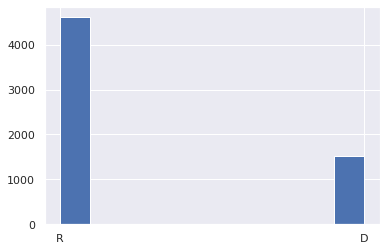

In [7]:
reddit_df['affiliation'].hist()
plt.show()